## Modelling 0/1 response in linear regression 

In [28]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv
from sklearn.datasets import load_boston
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

## Training Data Generation for 2 Class  Linear Model


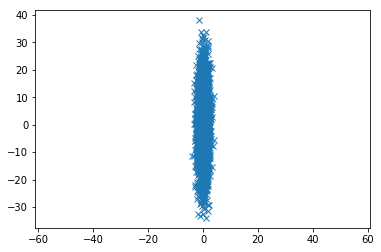

In [29]:
## example multivariate normal in python
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

## Simulating pesudo-data in 2 ways:

1) generate 2 classes of random variables x1, x2 from 2 different bivariate distributions 
<hr>
2) generate mixed classes of random variables x from 2 different bivariate distributions of x1 and x2 by building covariance of multivaraiate normal distribution

### Bivariate x1, x2 random variables generated

In [268]:
n = 100
K = 2 
mu1 = np.random.randn(2)
mu2 = 2*np.random.randn(2)
cov1 = 0
v11 = 2
v12 = 2
cov2 = 0
v21 = 2
v22 = 2

sigma1 = [[v11, cov1],[cov1, v12]]
sigma2 = [[v21, cov1],[cov2, v22]]


x1, y1 = np.random.multivariate_normal(mu1, sigma1, n).T
x2, y2 = np.random.multivariate_normal(mu2, sigma2, n).T

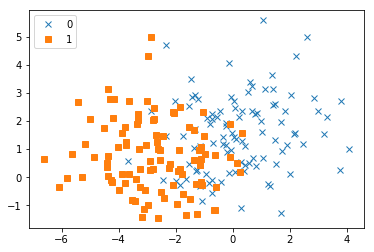

In [269]:
plt.plot(x1, y1, 'x', label='0')
plt.plot(x2, y2, 's', label='1')
#plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

### Simulating x, y from a multivariate normal of 2 uncorrelated bivariate random variable distributions of x1, x2

In [332]:
## calculating sample variance for x1 and x2
def sample_cov(x, n, k):
    x = x.reshape(k, n)
    q_init = np.zeros(shape=(k, k))
    for i in range(2):
        for j in range(2):
            if i == j:
                q_init[i][j] = np.var(x[i])
            else:
                for k in range(100):
                    q_init[i][j] += (1/(n-1))*(x[i][k] - np.mean(x[i]))*(x[j][k] - np.mean(x[j]))

    return q_init

## returns the covariance of bivariate variables to build y
x = np.concatenate((x1, x2), axis=0)
sigma = sample_cov(x, 100, 2)

x_train, y_train = np.random.multivariate_normal(mu1, sigma, n).T
x_test, y_test = np.random.multivariate_normal(mu2, sigma, n).T


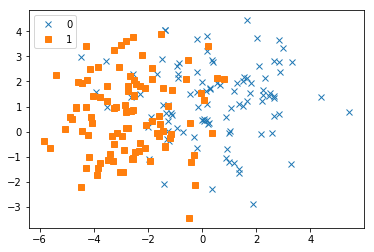

In [333]:
plt.plot(x_train, y_train, 'x', label='0')
plt.plot(x_test, y_test, 's', label='1')
#plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

## Linear Modeling of Generated Data

In [334]:
## construct model for training data x1 and xtotal x12
intall_1 = np.ones(shape=y1.shape)[..., None]
x1_reshape = x1.reshape(100, 1)
X1 = np.concatenate((intall_1, x1_reshape), 1)

## construct x
x12 = np.concatenate((x1, x2), 0)

array([ 7.33777083e-01,  3.54149275e-01,  2.78520720e+00, -3.90411453e-02,
        4.09924657e-01,  1.22602092e+00,  4.52984099e-02,  3.70592191e+00,
       -1.48120946e+00, -8.02355748e-02,  2.84082819e+00, -6.97099329e-01,
        2.15008401e+00,  1.57430774e+00,  5.77628895e-01,  1.71125948e+00,
        3.79922121e+00, -1.26176634e+00,  1.96197896e+00,  2.37789448e+00,
        2.12331351e+00,  5.99356221e-01,  1.33886309e+00,  9.73638396e-01,
        1.54871919e+00,  2.76081804e+00,  2.91128211e+00, -1.65566710e+00,
        1.92668584e+00,  9.78179854e-01,  6.40969707e-01,  4.43804723e+00,
       -1.04955705e+00,  2.03332712e+00,  2.30935832e+00,  2.73939812e+00,
        4.23939908e-01,  1.38496324e+00,  1.61316392e+00,  7.35309012e-01,
        1.73074100e+00,  1.95817141e+00, -6.63689064e-01,  1.56224353e+00,
        2.78663098e+00,  6.71409942e-01,  1.01219498e+00, -1.56196185e-03,
       -3.59024149e-01,  2.61474733e+00,  4.80333302e-01, -2.78078666e-01,
       -1.29527188e+00,  

In [336]:
## construct model for training data x_train and xtotal x_total
intall_train = np.ones(shape=y_train.shape)[..., None]
x_train_reshape = x_train.reshape(100, 1)
X_train = np.concatenate((intall_train, x_train_reshape), 1)

## construct x
x_total = np.concatenate((x_train1, x_test), 0)

In [373]:
y_total = np.concatenate((y_train, y_test), 0)


In [375]:
intall_total = np.ones(shape=y_total.shape)[..., None]

In [379]:
x_total

array([[-1.31526248e+00],
       [ 2.71843120e-01],
       [ 4.18757285e-01],
       [ 9.90304120e-01],
       [ 7.79480464e-02],
       [ 2.22867131e+00],
       [ 1.04956362e+00],
       [-1.83652946e-01],
       [ 1.34886159e+00],
       [ 2.17665731e+00],
       [ 3.65482584e-01],
       [ 9.25625552e-01],
       [ 1.64653874e+00],
       [-3.91417225e+00],
       [ 8.73585608e-01],
       [ 2.76316374e-01],
       [ 1.86184139e-01],
       [ 1.18261782e+00],
       [-1.12874751e-02],
       [-1.84712812e-01],
       [-8.83053057e-01],
       [-1.90254847e+00],
       [ 2.65045309e+00],
       [-1.52188342e-01],
       [ 2.50826901e+00],
       [ 3.34011911e+00],
       [-1.46800324e+00],
       [ 1.35757969e+00],
       [ 1.29435466e+00],
       [-3.50462390e+00],
       [ 2.66704395e+00],
       [ 1.67447653e+00],
       [ 8.71755634e-01],
       [ 1.50898654e+00],
       [-8.91307810e-01],
       [-8.49917484e-01],
       [-1.26040925e+00],
       [ 4.38046762e+00],
       [ 1.1

In [383]:
X_total = np.concatenate((intall_total, x_total), 1)

In [385]:
X_total

array([[ 1.00000000e+00, -1.31526248e+00],
       [ 1.00000000e+00,  2.71843120e-01],
       [ 1.00000000e+00,  4.18757285e-01],
       [ 1.00000000e+00,  9.90304120e-01],
       [ 1.00000000e+00,  7.79480464e-02],
       [ 1.00000000e+00,  2.22867131e+00],
       [ 1.00000000e+00,  1.04956362e+00],
       [ 1.00000000e+00, -1.83652946e-01],
       [ 1.00000000e+00,  1.34886159e+00],
       [ 1.00000000e+00,  2.17665731e+00],
       [ 1.00000000e+00,  3.65482584e-01],
       [ 1.00000000e+00,  9.25625552e-01],
       [ 1.00000000e+00,  1.64653874e+00],
       [ 1.00000000e+00, -3.91417225e+00],
       [ 1.00000000e+00,  8.73585608e-01],
       [ 1.00000000e+00,  2.76316374e-01],
       [ 1.00000000e+00,  1.86184139e-01],
       [ 1.00000000e+00,  1.18261782e+00],
       [ 1.00000000e+00, -1.12874751e-02],
       [ 1.00000000e+00, -1.84712812e-01],
       [ 1.00000000e+00, -8.83053057e-01],
       [ 1.00000000e+00, -1.90254847e+00],
       [ 1.00000000e+00,  2.65045309e+00],
       [ 1.

In [386]:
## train the model on xtrain, ytrain and predict for xtest, ytest
# coeffs_1 = inv(X1.transpose().dot(X1)).dot(X1.transpose()).dot(y1)
# coeffs_gen = inv(X_gen.transpose().dot(X_gen)).dot(X_gen.transpose()).dot(y_gen)
# coeffs_all = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
coeffs_train = inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)
coeffs_1 = inv(X1.transpose().dot(X1)).dot(X1.transpose()).dot(y1)
coeffs_all = inv(X_total.transpose().dot(X_total)).dot(X_total.transpose()).dot(y_total)


In [388]:
coeffs_train

array([ 1.23281181, -0.00232389])

## Linear Regression Decision Boundary and Results

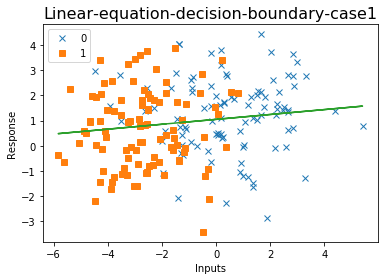

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 0.0008165
Date:                Sat, 09 Mar 2019   Prob (F-statistic):              0.977
Time:                        14:32:49   Log-Likelihood:                -180.99
No. Observations:                 100   AIC:                             366.0
Df Residuals:                      98   BIC:                             371.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2328      0.154      8.025      0.0

In [391]:
## Decision boundary numerical value
## it reprsents the boundary for the point to be classified as blue or orange point
## predict variables for x1 and x2 under y_hat condition
plt.plot(x_train, y_train, 'x', label='0')
plt.plot(x_test, y_test, 's', label='1')
plt.plot(x_total, coeffs_all[0] + coeffs_all[1]*x_total, '-')
#plt.axis('equal'
plt.xlabel('Inputs')
plt.ylabel('Response')
plt.legend(loc='upper left')
plt.title('Linear-equation-decision-boundary-case1', fontsize=16)
plt.show()

## print results of training data fit
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(results.summary())

In [393]:
## introduce bivariate class labels by LDA
## Y_hat > 0.5 and y_hat <= 0.5
## x: x'B > 0.5, x'B <= 0.5
## function to map indices for condition 

def find_indices(lst, condition):
    return [i for i, elem in enumerate(lst) if condition(elem)]
x_total = np.concatenate((x_train, x_test), 0)
y_hat_test = coeffs_all[0] + coeffs_all[1]*x_total
y_hat_b_test = y_hat_test[y_hat_test <= 0.5]
y_hat_o_test = y_hat_test[y_hat_test > 0.5]
print(y_hat_test)
print(y_hat_test.shape)

[0.91999941 1.07455026 1.08885662 1.14451332 1.05566894 1.26510435
 1.15028395 1.03019448 1.1794293  1.26003927 1.08366878 1.13821498
 1.20841683 0.66692003 1.13314738 1.07498586 1.06620887 1.16324064
 1.04697927 1.03009127 0.96208756 0.86281006 1.30617706 1.03325848
 1.29233131 1.37333609 0.90512566 1.18027827 1.17412147 0.70680146
 1.30779266 1.21113738 1.13296918 1.19502212 0.96128372 0.96531427
 0.92534097 1.47464424 1.16421863 0.93627485 1.07560775 1.10274818
 1.02847009 1.02856772 1.32646931 0.94083524 1.19709645 0.97816854
 0.92891937 0.95827009 1.06467414 0.92206222 1.36986591 0.90839233
 1.00559355 1.30658314 0.88627374 1.22351275 0.82379506 1.06470723
 1.0705351  1.19909311 0.85767955 1.02047721 1.0629     0.80086524
 1.26752092 1.15391192 1.57535373 1.32961223 0.91562283 1.11446685
 1.06615812 1.32431342 1.04774045 1.27498504 1.33997195 1.23081869
 1.26646007 1.30574658 0.92587852 1.08260728 1.21060097 1.28882753
 0.79304293 0.92665483 1.22201524 1.25224799 1.24658976 0.9100

In [394]:
o_indices_test = find_indices(y_hat_test, lambda e: e > np.mean(y_hat_test))
b_indices_test = find_indices(y_hat_test, lambda e: e <= np.mean(y_hat_test))
print(b_indices_test)

[0, 13, 21, 26, 29, 36, 39, 48, 51, 53, 56, 58, 62, 65, 70, 80, 84, 85, 89, 91, 92, 95, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 136, 138, 139, 140, 141, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 190, 191, 194, 195, 197, 198, 199]


In [390]:
y_hat_new = coeffs_all[0] + coeffs_all[1]*x_total

[ 0.73377708  1.57430774  0.59935622  2.91128211  0.97817985  0.42393991
  0.73530901 -0.35902415 -0.27807867  1.05200948  2.31215665  1.49345843
 -1.10439041  2.30910361  4.06175726  0.01755133  1.36373664  1.05100977
 -2.0835374   0.1986714   2.9629467   2.82336653  4.03328531 -0.14755606
  1.41085257 -0.23540321  0.01944557  0.12035316  1.88272327 -0.99227261
 -0.17885179 -0.38225306  2.0684858   0.16466761 -0.75962033  1.97512798
  1.45045738 -1.22795485  3.75965306  2.06259988 -1.07784482  0.51310112
 -0.15841405  0.41456078  0.87039814 -0.63895269  0.60198587  2.23834977
 -1.11480798  3.42463859  1.74621745 -0.81890761  0.02342879 -1.18585572
 -1.70484901  2.58853265  1.81590492  1.94417818 -1.42613842  0.27681704
  0.9996295   3.44695243 -1.62283012  1.83848244  3.60477939 -0.72734632
  0.13472654 -0.43930164  3.88492705  2.5624168  -0.55711368 -2.21551775
  1.63639505 -0.07450257  1.22675944  0.33804499 -1.46053316 -1.59073013
  0.82034487 -0.18763364  0.92814102  1.08271476  2

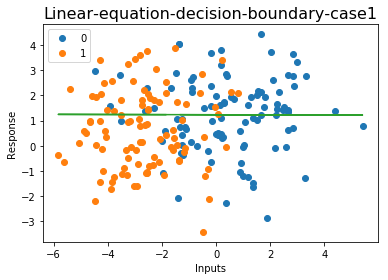

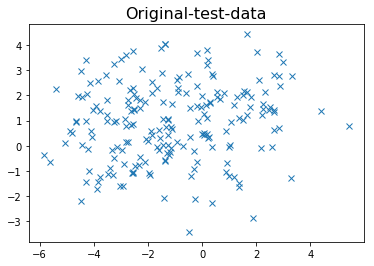

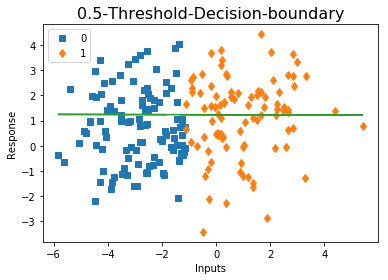

In [395]:
x_o_test = x_total[o_indices_test]
x_b_test = x_total[b_indices_test]
# x_new = np.concatenate((x_o, x_b), axis=0)

y_total = np.concatenate((y_train, y_test), 0)
y_o_test = y_total[o_indices_test]
y_b_test = y_total[b_indices_test]
# y_new = np.concatenate((y_o, y_b), axis=0)
print(y_b_test)
## classification by residuals
# y_obs = y_test.reshape(100,1)
# e = y_obs - y_hat
# e_o = find_indices(e, lambda x: x > 0)
# e_b = find_indices(e, lambda x: x <= 0)
plt.plot(x_train, y_train, 'o', label='0')
plt.plot(x_test, y_test, 'o', label='1')
plt.plot(x_total, coeffs_train[0] + coeffs_train[1]*x_total, '-')
#plt.axis('equal')
plt.xlabel('Inputs')
plt.ylabel('Response')
plt.legend(loc='upper left')
plt.title('Linear-equation-decision-boundary-case1', fontsize=16)
plt.show()


# x_o_e = x[e_o]
# y_o_e = y[e_o]
# x_b_e = x[e_b]
# y_b_e = y[e_b]
plt.plot(x_total, y_total, 'x', label='2')
plt.title('Original-test-data', fontsize=16)
plt.show()

plt.plot(x_b_test, y_b_test, 's', label='0')
plt.plot(x_o_test, y_o_test, 'd', label='1')
plt.plot(x_total, coeffs_train[0] + coeffs_train[1] * x_total, '-')
plt.xlabel('Inputs')
plt.ylabel('Response')
#plt.axis('equal')
plt.legend(loc='upper left')
plt.title('0.5-Threshold-Decision-boundary', fontsize=16)
plt.show()

# plt.plot(x_b_e, y_b_e, 'x', label='0')
# plt.plot(x_o_e, y_o_e, 's', label='1')
# plt.plot(x, coeffs[0] + coeffs[1] * x, '-')
# plt.xlabel('Inputs')
# plt.xlabel('Response')
# plt.legend(loc='upper left')
# plt.title('Residual-decision-boundary', fontsize=16)

# plt.show()


## Conclusions

Three different decision boundary thresholds for a 2 class bivariate dataset, distributed normally and homoscedastically, with different means can be compared. 

1) **First Decision Boundary** is based on the initial generation of x1 and x2 as 2 separate classes 0 and 1 and the linear-model decision boundary given by: >
**$$ \bf{y = X\beta + \epsilon} $$**

2) **Threshold Decision Boundary** is based on classifying $$ \bf{\hat{y} > 0.5 \sim 1} $$ $$ \bf{\hat{y} \leq 0.5 \sim 0} $$ denoted  by orange and blue respectively

3) **Residual Decision Boundary** is based on classifying $$ \bf{\hat{y} - y > 0, \hat{y} - y  \leq{0}}$$ as orange and blue respectively 

From the 3 plots, it is evident that there is scope for misclassification through all three decision boundary conditions. The Residual based decision boundary shows the best results but faces misclassification for points close to the regression line.